# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx



Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

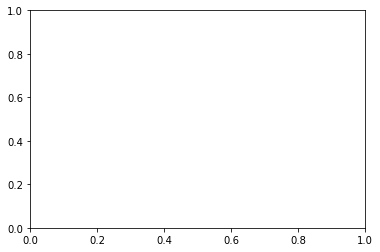

In [116]:
fig, ax = plt.subplots()

In [23]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
# How many neighbourhood groups / which shows up the most
# 5 neighbourhood groups
# Manhattan shows up the most at 21,661 times

# neighbour_group = air_bnb['neighbourhood_group']
# neighbour_group = air_bnb['neighbourhood_group'].mode()
neighbour_group = air_bnb['neighbourhood_group'].value_counts()

# neighbour_group = air_bnb.groupby(['neighbourhood_group']).count()
neighbour_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [19]:
# Are private rooms the most popular in Manhattan?
# No, Entire home/apt rentals are the most popular, followed by Private rooms, and Shared rooms are a distant third.

manhattan_rooms = air_bnb[air_bnb['neighbourhood_group'] == 'Manhattan']
manhattan_rooms['room_type'].value_counts()


Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64

In [97]:
# Who are the top 10 busiest hosts based on number of reviews per month?
columns = ['host_name', 'host_id', 'reviews_per_month']
hosts = air_bnb[columns]
# hosts
hosts = hosts.groupby(['host_name', 'host_id']).sum('reviews_per_month').reset_index()
hosts.sort_values('reviews_per_month', ascending=False).head(10)

,host_name,host_id,reviews_per_month
33222,Sonder (NYC),219517861,397.56
30779,Row NYC,244361589,111.72
20622,Lakshmee,232251881,80.63
8599,Danielle,26432133,68.02
9112,David,137274917,62.89
12595,Gabriel,224414117,59.10
3800,Asad,156948703,56.44
5444,Brooklyn& Breakfast -Len-,344035,56.00
26590,Nalicia,156684502,54.38
24584,Maya,37312959,53.53


In [76]:
sonder = air_bnb[air_bnb['host_id'] == 219517861]
sonder = sonder['reviews_per_month'].sum()
sonder

397.56

  neighbourhood_group   price
0               Bronx   87.50
1            Brooklyn  124.38
2           Manhattan  196.88
3              Queens   99.52
4       Staten Island  114.81


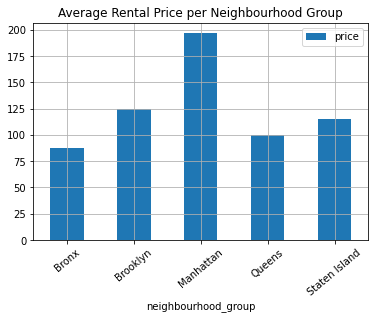

In [147]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
columns = ['neighbourhood_group', 'price']
price_per_night = air_bnb[columns]
price_per_night = price_per_night.groupby('neighbourhood_group').mean().round(2).reset_index()
print(price_per_night)
price_per_night.plot.bar(x="neighbourhood_group", y="price", rot=40, title="Average Rental Price per Neighbourhood Group", grid=True)

plt.show()

In [175]:
# What is the most expensive neighbourhood in each neighbourhood_group
exp_neighbourhood = air_bnb.groupby(['neighbourhood_group', 'neighbourhood']).mean().round(2)[['price']]
exp_neighbourhood

price
neighbourhood_group neighbourhood        
Bronx               Allerton        87.60
                    Baychester      75.43
                    Belmont         77.12
                    Bronxdale       57.11
                    Castle Hill     63.00
...                                   ...
Staten Island       Tottenville    144.86
                    West Brighton   80.56
                    Westerleigh     71.50
                    Willowbrook    249.00
                    Woodrow        700.00

[221 rows x 1 columns]

In [204]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['min_rental'] = air_bnb['price'] * air_bnb['minimum_nights']
highest_min = air_bnb[['id', 'host_name', 'min_rental']].sort_values(by='min_rental',ascending=False)
highest_min.head(1)

,id,host_name,min_rental
48043,36056808,Jenny,1170000


In [202]:
air_bnb[air_bnb['id'] == 36056808]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365,1170000


In [218]:
# Who has no (zero) availability with a review count of 100 or more
# availability = 0
zero_avail = air_bnb[air_bnb['availability_365'] == 0]
# grouping by host id, sum number of reviews
zero_avail = zero_avail.groupby('host_id').sum()[['number_of_reviews']].reset_index()
# only rows with number of reviews >= 100
zero_avail = zero_avail[zero_avail['number_of_reviews'] >= 100]
# sorting by reviews
zero_avail.sort_values('number_of_reviews', ascending=False)

,host_id,number_of_reviews
8360,22959695,1157
14279,99392252,732
14802,121391142,693
715,792159,480
10655,37818581,479
...,...,...
11191,42399786,100
15202,140293912,100
14225,96148809,100
8234,22423049,100


In [205]:
air_bnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149


In [224]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb['max_profit'] = air_bnb['price'] * air_bnb['availability_365']
host_profit = air_bnb[['host_name', 'max_profit']]
host_profit.groupby('host_name').sum('max_profit').sort_values('max_profit', ascending=False).head(5)

,max_profit
host_name,
Sonder (NYC),24563716
Blueground,18021038
Jessica,11045293
Kara,10656021
David,7834953


In [231]:
# When did Danielle from Queens last receive a review?
# 2019-07-08
dani = air_bnb[air_bnb['host_name'] == "Danielle"]
dani = dani[dani['neighbourhood_group'] == 'Queens' ]
dani = dani[['host_name', 'last_review']]
dani.sort_values('last_review', ascending=False).head(1)

,host_name,last_review
22469,Danielle,2019-07-08


In [232]:
air_bnb.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_rental,max_profit
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,149,54385


neighbourhood_group  room_type      
Bronx                Private room       652
                     Entire home/apt    379
                     Shared room         60
Name: room_type, dtype: int64


<AxesSubplot:title={'center':'Count of Room Types in the Bronx'}, xlabel='Room Types', ylabel='List Count'>

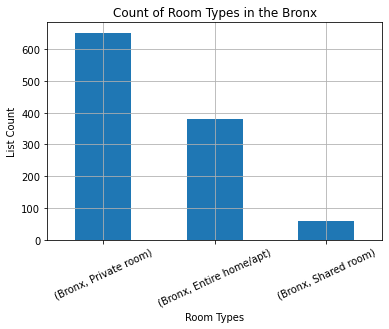

In [252]:
# bar chart showing the number of room types in the Bronx
bronx_rooms = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
bronx_rooms = bronx_rooms[['neighbourhood_group', 'room_type']]
bronx_rooms = bronx_rooms.groupby('neighbourhood_group')['room_type'].value_counts()
print(bronx_rooms)
bronx_rooms.plot.bar(xlabel="Room Types", rot=25, ylabel="List Count", title="Count of Room Types in the Bronx", grid=True)

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [259]:
room_type_price = air_bnb[['room_type', 'price']]
room_type_price.groupby('room_type').mean('price')

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


As expected the mean price for an entire home or apartment is over twice as expensive as a private room. But surprisingly a private room is only slightly more expensive than a shared room.